In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
# fetch dataset
df = fetch_ucirepo(id=42).data.original
df.head()

,Id_number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
# drop unecessary column
df.drop(['Id_number'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             214 non-null    float64
 1   Na             214 non-null    float64
 2   Mg             214 non-null    float64
 3   Al             214 non-null    float64
 4   Si             214 non-null    float64
 5   K              214 non-null    float64
 6   Ca             214 non-null    float64
 7   Ba             214 non-null    float64
 8   Fe             214 non-null    float64
 9   Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
# clean data
if df.isnull().sum().sum():
  print("null values found")
  df.dropna.reset_index(drop=True, inplace = True)
if df.duplicated().sum():
  print("duplicates found")
  df.drop_duplicates().reset_index(drop=True, inplace = True)

duplicates found


In [6]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


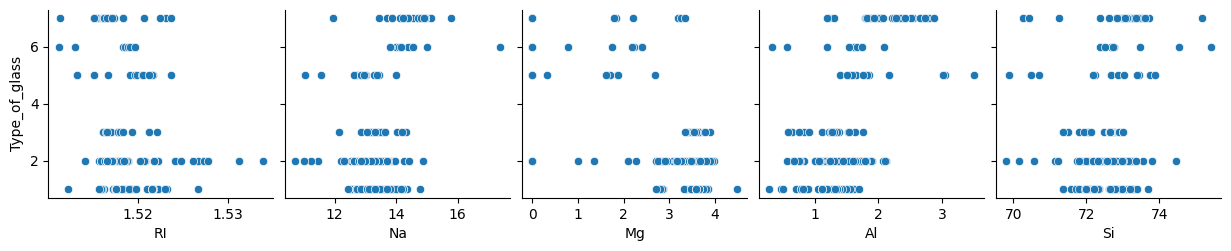

In [8]:
sns.pairplot(
    df,
    x_vars=["RI", "Na", "Mg", "Al","Si"],
    y_vars=["Type_of_glass"],
)

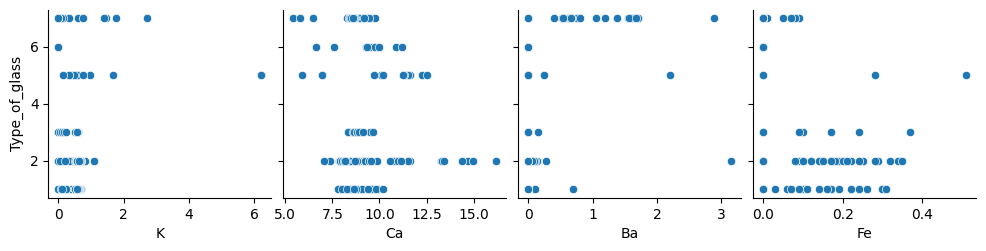

In [9]:
sns.pairplot(
    df,
    x_vars=["K", "Ca", "Ba", "Fe",],
    y_vars=["Type_of_glass"],
)

In [10]:
# features and target
X = df.drop('Type_of_glass', axis=1)
y = df['Type_of_glass']

Text(0, 0.5, 'Accuracy')

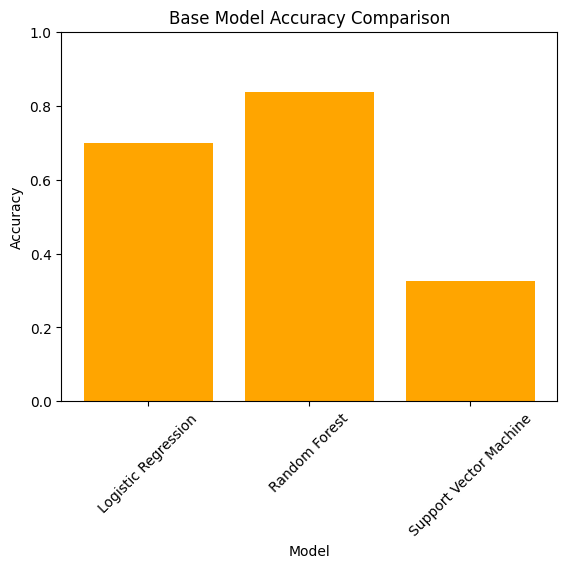

In [11]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# base model
base_model = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42, probability=True)
}

base_model_results = {}

for name, model in base_model.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions, normalize=True)
    base_model_results[name] = accuracy

# plot
plt.bar(list(base_model_results.keys()), list(base_model_results.values()), color='orange')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.title('Base Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')

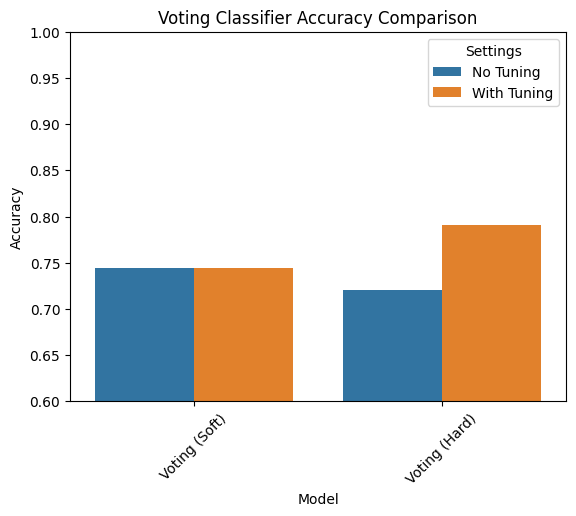

In [12]:
# voting
total_score = sum(base_model_results.values())

voting_models = {
  "Voting (Soft)" : VotingClassifier(estimators=list(base_model.items()), voting='soft'),
  "Voting (Hard)" : VotingClassifier(estimators=list(base_model.items()), voting='hard'),
  "Voting (Soft-Tuned)" : VotingClassifier(estimators=list(base_model.items()), weights=[base_model_results[name] / total_score for name in base_model.keys()], voting='soft'),
  "Voting (Hard-Tuned)" : VotingClassifier(estimators=list(base_model.items()), weights=[base_model_results[name] / total_score for name in base_model.keys()], voting='hard')
}

voting_model_results = {}
voting_model_results_untuned = {}
voting_model_results_tuned = {}

for name, model in voting_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions, normalize=True)
    if "Tuned" in name:
      voting_model_results_tuned[name.replace("-Tuned","")] = accuracy
    else:
      voting_model_results_untuned[name] = accuracy
    voting_model_results[name] = accuracy

results_df = pd.DataFrame({
    "Model": list(voting_model_results_untuned.keys()) + list(voting_model_results_tuned.keys()),
    "Accuracy": list(voting_model_results_untuned.values()) + list(voting_model_results_tuned.values()),
    "Settings": ['No Tuning'] * len(voting_model_results_untuned) + ['With Tuning'] * len(voting_model_results_tuned)
})

# plot
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Settings')
plt.ylim(0.6, 1.0)
plt.xticks(rotation=45)
plt.title('Voting Classifier Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

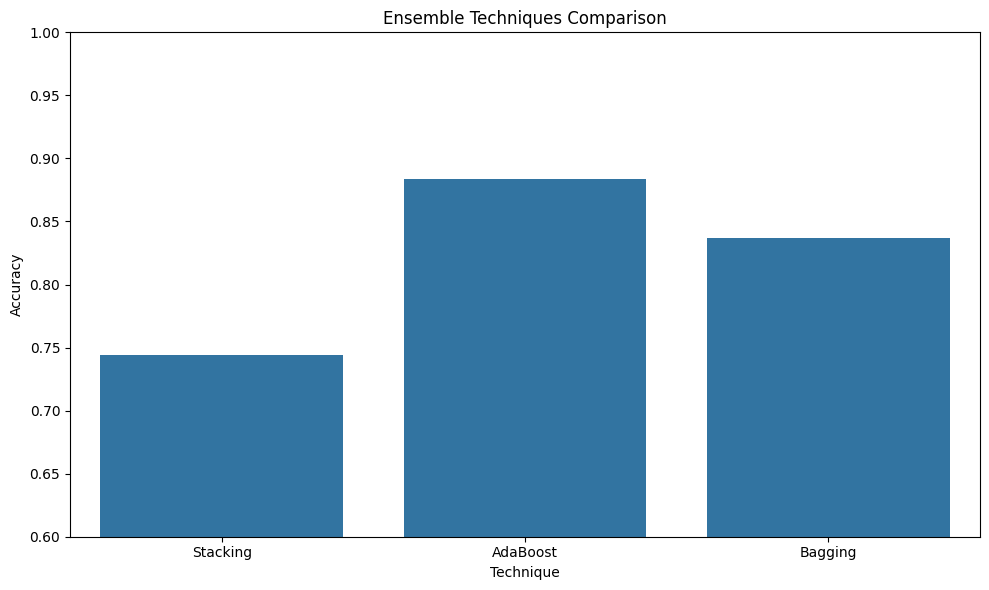

In [13]:
# Find the highest performing model
highest_model_name = max(base_model_results, key=base_model_results.get)
highest_model = base_model[highest_model_name]

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=LogisticRegression(max_iter=10000))
stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators=100)
adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators=100)
bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

ensemble_models_results = {
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(ensemble_models_results.keys()), y=list(ensemble_models_results.values()))
plt.xlabel('Technique')
plt.ylabel('Accuracy')
plt.title('Ensemble Techniques Comparison')
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()

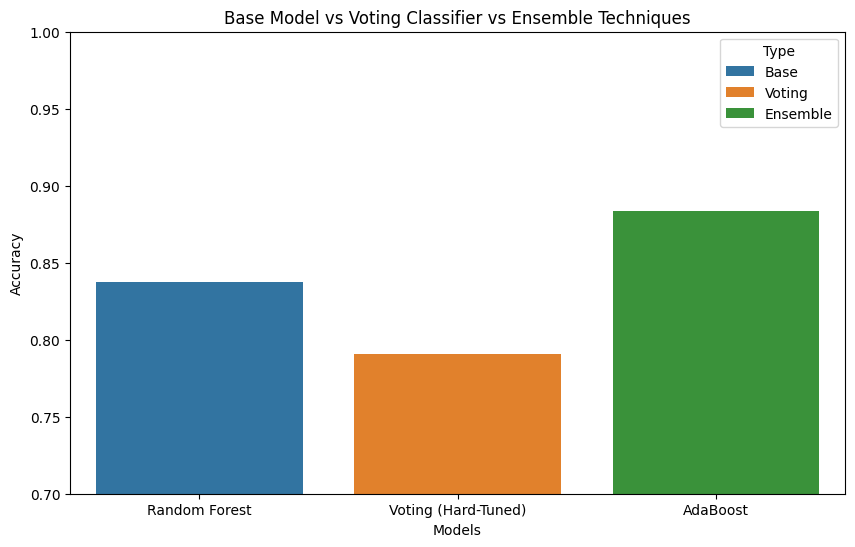

In [20]:
# Get Highest Model from 3 different Categories
highest_model_results = {
    "Model" :   [max(base_model_results, key=base_model_results.get)] + [max(voting_model_results, key=voting_model_results.get)] + [max(ensemble_models_results, key=ensemble_models_results.get)],
    "Accuracy": [max(base_model_results.values())] + [max(voting_model_results.values())] + [max(ensemble_models_results.values())],
    "Type" : ["Base", "Voting", "Ensemble"]
}

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data = highest_model_results, x="Model", y="Accuracy", hue="Type")
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Base Model vs Voting Classifier vs Ensemble Techniques')
plt.ylim(0.7, 1.0)
plt.show()

In [15]:
# Export Best Model
from joblib import dump, load
dump(adaboost_model, 'best_model.joblib')

# Get Model
from google.colab import files
files.download('best_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>